<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Gradient Descent Code-Along

Let's walk through how gradient descent works using code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The objective function
def f(x):
    return -np.log(x) / (1 + x) ## ln(x) / (1+x)

In [3]:
# Derivative of the objective function
def f_deriv(x):
    return -(1 + 1/x - np.log(x)) / (1 + x)**2

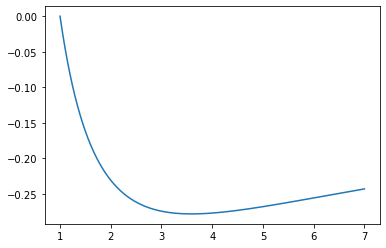

In [4]:
# Let's see what it looks like
xs = np.linspace(1, 7, 1000)
plt.plot(xs, f(xs));

In [5]:
# Initial value and learning rate
x = 1
alpha = 1

# Iterate and apply gradient descent
x_steps = [x]
for i in range(300):
    x = x - alpha * f_deriv(x)
    x_steps.append(x)
#     print(f"{i}: {x}")

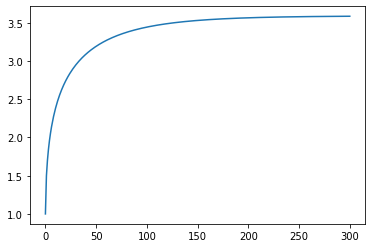

In [6]:
plt.plot(x_steps);

## Let's see if we can do OLS by Gradient Descent!

In [7]:
# Set a random seed.
np.random.seed(42)

In [8]:
# Randomly generate data from a Poisson(45) distribution.
temp = np.random.poisson(45, 100)

In [9]:
# View array.
temp

array([42, 50, 37, 47, 52, 38, 41, 44, 47, 41, 44, 38, 47, 47, 41, 49, 36,
       40, 41, 46, 58, 47, 34, 29, 43, 52, 40, 37, 51, 49, 51, 42, 53, 42,
       41, 50, 55, 36, 50, 51, 45, 41, 56, 43, 39, 41, 57, 48, 52, 55, 41,
       39, 43, 36, 59, 45, 63, 45, 40, 47, 30, 56, 37, 48, 39, 42, 48, 34,
       41, 49, 45, 48, 49, 58, 42, 40, 52, 46, 55, 42, 48, 47, 35, 46, 48,
       49, 41, 48, 48, 34, 40, 55, 51, 46, 38, 40, 48, 56, 44, 41])

In [10]:
# Calculate mean and sample variance of array.
print(np.mean(temp))
print(np.var(temp, ddof = 1))

45.18
45.07838383838384


**Ohio State Fun Facts:**
1. Ohio Stadium can seat 104,944 people. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Ohio_Stadium).)
2. Ohio Stadium's record attendance is 110,045 people. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Ohio_Stadium).)
3. Ohio State is better than Michigan. (Source: It's just a fact.)
4. Ohio State students enjoy soda. (Source: first-hand knowledge.)

In [11]:
# sodas ~ N(200000 + 1000 * temp, 20000)
sodas_sold = 200000 + 1000 * temp + np.round(np.random.normal(0, 20000, 100))

In [12]:
sodas_sold

array([233070., 267128., 241282., 222085., 255464., 245706., 223323.,
       247075., 248164., 218141., 251156., 249216., 268661., 268076.,
       213447., 230243., 246301., 250276., 251301., 323055., 269418.,
       269711., 253080., 242028., 236695., 267179., 224543., 232264.,
       241293., 250637., 297293., 204655., 266725., 209746., 231561.,
       271779., 256286., 214445., 235694., 264592., 230393., 245329.,
       256911., 229968., 281879., 253678., 216497., 251729., 238764.,
       272049., 225150., 236705., 253100., 253315., 234994., 238310.,
       253501., 231933., 275309., 255100., 204782., 274357., 279443.,
       268649., 208613., 232315., 273338., 219847., 249876., 264493.,
       226461., 246809., 184175., 237512., 236949., 215044., 284648.,
       217397., 246199., 244615., 276825., 218283., 258263., 246205.,
       228370., 258242., 244981., 235996., 249396., 226294., 242270.,
       268243., 282720., 221244., 280661., 200958., 244964., 267766.,
       249620., 2285

$$ \text{sodas_sold}_i = 200000 + 1000 * \text{temp}_i + \varepsilon_i $$

In [13]:
# Create dataframe with temp and sodas_sold.
df = pd.DataFrame({'temp': temp,
                   'sodas': sodas_sold})

In [14]:
# Check the first five rows.
df.head()

,temp,sodas
0,42,233070.0
1,50,267128.0
2,37,241282.0
3,47,222085.0
4,52,255464.0


#### Our goal is to fit a model here.
- You and I know that our $y$-intercept $\beta_0$ is 200,000.
- You and I know that our slope $\beta_1$ is 1,000.
- However, our computer does not know that. Our computer has to estimate $\hat{\beta}_0$ and $\hat{\beta}_1$ from the data.
    - We might say that our **machine** has to... **learn**.

#### Our workflow:
1. Instantiate model.
2. Select a learning rate $\alpha$.
3. Select a starting point $\hat{\beta}_{1,0}$.
4. Calculate the gradient of the loss function.
5. Calculate $\hat{\beta}_{1,i+1} = \hat{\beta}_{1,i} - \alpha * \frac{\partial L}{\partial \beta_1}$.
6. Check value of $\left|\hat{\beta}_{1,i+1} - \hat{\beta}_{1,i}\right|$.
7. Repeat steps 4 through 6 until "stopping condition" is met.

#### Step 1. Instantiate model.

Our model takes on the form:
$$ Y = \beta_0 + \beta_1 X + \varepsilon$$

#### Step 2. Select a learning rate $\alpha$.

$$\alpha = 0.1$$

In [15]:
alpha = 0.1

#### Step 3. Select a starting point.
The zero-th iteration of $\hat{\beta}_1$ is going to start at, say, 20.
$$\hat{\beta}_{1,0} = 20$$

Two points:
- You and I know that the true value of $\beta_1$ is 1000. We need the computer to figure (machine to learn) that part out!
- We're going to pretend like the computer already knows the value for $\beta_0$. In reality, we'd have to do this for $\beta_0$ and for $\beta_1$ at the same time.

In [16]:
beta_1 = 20

#### Step 4. Calculate the gradient of the loss function with respect to parameter $\beta_1$.

The loss function, $L$, is our mean square error.

$$L = \frac{1}{n}\sum_{i = 1} ^ n (y_i - \hat{y}_i)^2 $$

$$\Rightarrow L = \frac{1}{n}\sum_{i = 1} ^ n \left(y_i - \left(\hat{\beta}_0 + \hat{\beta}_1x_i\right)\right)^2 $$

The gradient of this loss function with respect to $\beta_1$ is:

$$\frac{\partial L}{\partial \beta_1} = \frac{2}{n} \sum_{i=1}^n -x_i\left(y_i - \left(\hat{\beta}_1x_i + \hat{\beta}_0\right)\right) $$

In [17]:
# Calculate gradient of beta_1.

# Matt's bad code - preserved for posterity.
# def beta_1_gradient(x, y, beta_1, beta_0):
#     n = len(x)
#     # Start gradient at 0.
#     gradient = 0
#     # Begin summation.
#     for i in range(n):
#         # Add gradient for each observation.
#         gradient += -1 * x[i] * (y[i] - (beta_1 * x[i] + beta_0))
#     # Multiply gradient by 2 / n.
#     gradient *= (2 / n)
#     return gradient

# Tim's good code - to see what a differnce numpy makes
def beta_1_gradient(x, y, beta_1, beta_0):
    grads = -x * (y - (beta_1*x + beta_0))
    return 2 * np.mean(grads)

#### Step 5. Calculate $\hat{\beta}_{1,i+1} = \hat{\beta}_{1,i} - \alpha * \frac{\partial L}{\partial \beta_1}$.

In [18]:
# Define function to calculate new value of beta_1.
def update_beta_1(beta_1, alpha, gradient):
    beta_1 = beta_1 - alpha * gradient
    return beta_1

#### Step 6. Check value of $\left|\hat{\beta}_{1,i+1} - \hat{\beta}_{1,i}\right|$.

In [19]:
def check_update(beta_1, updated_beta_1, tolerance = 0.1):
    return abs(beta_1 - updated_beta_1) < tolerance

#### Step 7: Save final value of $\hat{\beta}_1$.

#### Putting it all together...

In [20]:
def gradient_descent(x, y, beta_1 = 0, alpha = 0.01, max_iter = 100):
    # Set converged = False.
    converged = False
    
    # Iterate through our observations.
    step = 0
    while not converged:
        
        # Calculate gradient.
        gradient = beta_1_gradient(x, y, beta_1, 200000)
        
        # Update beta_1.
        updated_beta_1 = update_beta_1(beta_1, alpha, gradient)
        
        # Check for convergence.
        converged = check_update(beta_1, updated_beta_1)
        
        # Overwrite beta_1.
        beta_1 = updated_beta_1
        
        # Print out current step findings.
        print(f'Iteration {step} with beta_1 value of {beta_1}.')
        
        # If we've converged, let us know!
        if converged:
            print(f'Our algorithm converged after {step} iterations with a beta_1 value of {beta_1}.')
        else:
            step += 1
            
        # If we exceed our step limit, break!
        if step > max_iter:
            break
        
    # If we didn't converge by the end of our loop, let us know!
    if not converged:
        print("Our algorithm did not converge, so do not trust the value of beta_1.")
    
    # Return beta_1.
    return beta_1

In [21]:
# Call gradient_descent with an initial beta_1 of 20, alpha of 0.01, and 100 iterations.
gradient_descent(df['temp'],
                 df['sodas'],
                 beta_1 = 20,
                 alpha = 0.01,
                 max_iter = 100)

Iteration 0 with beta_1 value of 41435.536400000005.
Iteration 1 with beta_1 value of -1644889.1423060799.
Iteration 2 with beta_1 value of 67017530.06550511.
Iteration 3 with beta_1 value of -2728723925.302785.
Iteration 4 with beta_1 value of 111106040061.21898.
Iteration 5 with beta_1 value of -4523926812130.785.
Iteration 6 with beta_1 value of 184201632837141.5.
Iteration 7 with beta_1 value of -7500174724514208.0.
Iteration 8 with beta_1 value of 3.053861142930322e+17.
Iteration 9 with beta_1 value of -1.2434467492892207e+19.
Iteration 10 with beta_1 value of 5.062966998015906e+20.
Iteration 11 with beta_1 value of -2.0614983985161323e+22.
Iteration 12 with beta_1 value of 8.393844259206108e+23.
Iteration 13 with beta_1 value of -3.4177383547094688e+25.
Iteration 14 with beta_1 value of 1.3916073613637641e+27.
Iteration 15 with beta_1 value of -5.666235525412065e+28.
Iteration 16 with beta_1 value of 2.307132451353081e+30.
Iteration 17 with beta_1 value of -9.393997344823367e+31.

3.84075466440001e+165

<details><summary>What should we do?</summary>

- We **should not** adjust our maximum iterations. It doesn't look like we'll converge.
- We should adjust our alpha!
</details>

In [22]:
gradient_descent(df['temp'],
                 df['sodas'],
                 beta_1 = 20,
                 alpha = 0.0001,
                 max_iter = 100)

Iteration 0 with beta_1 value of 434.155364.
Iteration 1 with beta_1 value of 675.536706489392.
Iteration 2 with beta_1 value of 816.2205115697993.
Iteration 3 with beta_1 value of 898.214972317203.
Iteration 4 with beta_1 value of 946.0036398856907.
Iteration 5 with beta_1 value of 973.8562134272973.
Iteration 6 with beta_1 value of 990.0894731594049.
Iteration 7 with beta_1 value of 999.5506714625496.
Iteration 8 with beta_1 value of 1005.0649227471749.
Iteration 9 with beta_1 value of 1008.2787827948905.
Iteration 10 with beta_1 value of 1010.1519104187804.
Iteration 11 with beta_1 value of 1011.2436216455569.
Iteration 12 with beta_1 value of 1011.8799015164366.
Iteration 13 with beta_1 value of 1012.2507432410217.
Iteration 14 with beta_1 value of 1012.4668801816782.
Iteration 15 with beta_1 value of 1012.5928508425271.
Iteration 16 with beta_1 value of 1012.6662700708484.
Our algorithm converged after 16 iterations with a beta_1 value of 1012.6662700708484.


1012.6662700708484